We carry out the modelling process using various approaches. As can be seen in EDA, the dataset has a considerable amount of missing values, which makes some machine learning algorithms not handy. In these cases, we shall need imputed features. This is done separately, so that both imputed and un-imputed features are present, catering for different needs of the models.

The first part gathers features we need from the data tables. Then, we train our model. In thise notebook, we are going to use XGBoost which allows missing values by default, so we won't impute any data.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from seaborn import set_style

set_style("whitegrid")

file_path = 'home-credit-credit-risk-model-stability/csv_files/train' #change the path if needed

# 1) Loading features

mastercontrelectronic_519L
Features from person_1:

mainoccupationinc_384A
childnum_185L','familystate_447L'
incometype_1044T, sex_738L,safeguarantyflag_411L, education_927M, birth_259D(numgroup=0






In [85]:
# Load the basic info
data_train = pd.read_csv(file_path+'/train_'+'base.csv')

In [86]:
# Get features from person_1
# Get mainoccupationinc_384A
person_1 = pd.read_csv(file_path+'/train_'+'person_1.csv')
df = person_1.filter(['case_id','mainoccupationinc_384A'])
df = df.groupby('case_id').agg('max')
data_train['mainoccupationinc_384A'] = df['mainoccupationinc_384A'].values
del person_1, df

# Get number of children ('childnum_185L') and family status ('familystate_447L')
person_1 = pd.read_csv(file_path+'/train_'+'person_1.csv')

df = person_1.filter(['case_id','childnum_185L','familystate_447L','num_group1'])
data_train['familystate_447L'] = df[df['num_group1']==0]['familystate_447L'].values

df['childnum_185L']=df['childnum_185L'].fillna(0)
df2 = pd.DataFrame({'case_id': data_train['case_id'],
                    'childnum_185L': df.filter(['case_id','childnum_185L']).groupby('case_id').sum()['childnum_185L'].values})
data_train['childnum_185L']=df2['childnum_185L']
del df, df2

# Get incometype_1044T, sex_738L,safeguarantyflag_411L, education_927M, birth_259D
get_feat = ['incometype_1044T','sex_738L','safeguarantyflag_411L','education_927M','birth_259D']
df = person_1.filter(get_feat+['case_id','num_group1'])

for i in get_feat:
    data_train[i] = df[df['num_group1']==0][i].values

del df, person_1, get_feat

/var/folders/3h/y079f1p91rx6mnr55mvdl__h0000gn/T/ipykernel_1172/717953781.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  person_1 = pd.read_csv(file_path+'/train_'+'person_1.csv')
/var/folders/3h/y079f1p91rx6mnr55mvdl__h0000gn/T/ipykernel_1172/717953781.py:10: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  person_1 = pd.read_csv(file_path+'/train_'+'person_1.csv')


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526659 entries, 0 to 1526658
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   case_id                 1526659 non-null  int64  
 1   date_decision           1526659 non-null  object 
 2   MONTH                   1526659 non-null  int64  
 3   WEEK_NUM                1526659 non-null  int64  
 4   target                  1526659 non-null  int64  
 5   mainoccupationinc_384A  1526659 non-null  float64
 6   familystate_447L        728613 non-null   object 
 7   childnum_185L           1526659 non-null  float64
 8   incometype_1044T        1526659 non-null  object 
 9   sex_738L                1526659 non-null  object 
 10  safeguarantyflag_411L   1526657 non-null  object 
 11  education_927M          1526659 non-null  object 
 12  birth_259D              1526659 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 151.4+ M

In [87]:
# convert birthdate
data_train['birth_259D'] = data_train.birth_259D.apply(lambda x: 2024-int(x[:4]))

From static:

'maininc_215A','annuity_780A','applications30d_658L','mastercontrelectronic_519L','numinstlsallpaid_934L','numinstlswithdpd10_728L','numinstlswithoutdpd_562L','numinstpaid_4499208L','numinsttopaygrest_4493213L','pmtnum_254L','totaldebt_9A','totalsettled_863A'

need cleaning:
mastercontrelectronic_519L: replace 0 by 1, nan by 0





In [88]:
# Get features from static_0
get_feat_static=['maininc_215A','annuity_780A','applications30d_658L','mastercontrelectronic_519L','numinstlsallpaid_934L','numinstlswithdpd10_728L','numinstlswithoutdpd_562L','numinstpaid_4499208L','numinsttopaygrest_4493213L','pmtnum_254L','totaldebt_9A','totalsettled_863A']

static = pd.read_csv(file_path+'/train_'+'static_0_0.csv')
df = static[['case_id']+get_feat_static]
del static
static2 = pd.read_csv(file_path+'/train_'+'static_0_1.csv')
df2 = static2[['case_id']+get_feat_static]
del static2
df = pd.concat([df, df2])
del df2
for i in df.columns:
    if i != 'case_id':
        data_train[i] = df[i].values
del df

/var/folders/3h/y079f1p91rx6mnr55mvdl__h0000gn/T/ipykernel_1172/2218450954.py:4: DtypeWarning: Columns (20,45,46,53,57,84,143,146,167) have mixed types. Specify dtype option on import or set low_memory=False.
  static = pd.read_csv(file_path+'/train_'+'static_0_0.csv')
/var/folders/3h/y079f1p91rx6mnr55mvdl__h0000gn/T/ipykernel_1172/2218450954.py:7: DtypeWarning: Columns (20,45,46,56,57,84,143,146,167) have mixed types. Specify dtype option on import or set low_memory=False.
  static2 = pd.read_csv(file_path+'/train_'+'static_0_1.csv')


In [89]:
# Convert values in mastercontrelectronic_519L
data_train['mastercontrelectronic_519L'] = data_train['mastercontrelectronic_519L'].apply(lambda x: 1 if x==0 else 0)

Get static_cb features

In [90]:
# Get 'numberofqueries_373L' and 'riskassesment_302T' from static info of cb data
static_cb = pd.read_csv(file_path+'/train_static_cb_0.csv')
data_train = data_train.merge(static_cb.filter(['case_id','numberofqueries_373L','riskassesment_302T']), on='case_id', how='left')
del static_cb

/var/folders/3h/y079f1p91rx6mnr55mvdl__h0000gn/T/ipykernel_1172/4068579629.py:2: DtypeWarning: Columns (1,2,3,4,7,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  static_cb = pd.read_csv(file_path+'/train_static_cb_0.csv')


In [91]:
# Get max dpd from previous applications. For convenience, we directly impute and aggregate here.
prev_apply = pd.read_csv(file_path+'/train_'+'applprev_1_1.csv')

#fill NA with 0
df = prev_apply.filter(['case_id','actualdpd_943P'])
df['actualdpd_943P']=df['actualdpd_943P'].fillna(0)

#group by max and join
df1 = pd.DataFrame({'case_id1': prev_apply.filter(['case_id','actualdpd_943P']).groupby('case_id').max().index.values,
                    'prevdpd_max': prev_apply.filter(['case_id','actualdpd_943P']).groupby('case_id').max()['actualdpd_943P']})
df2 = pd.DataFrame({'case_id1': data_train['case_id']})
df3 = pd.merge(df2, df1, on='case_id1', how='outer')
df3['prevdpd_max']=df3['prevdpd_max'].fillna(0)

data_train['prevdpd_max']=df3['prevdpd_max']
del df, df1, df2, df3, prev_apply

/var/folders/3h/y079f1p91rx6mnr55mvdl__h0000gn/T/ipykernel_1172/3256063790.py:2: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  prev_apply = pd.read_csv(file_path+'/train_'+'applprev_1_1.csv')


In [98]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526659 entries, 0 to 1526658
Data columns (total 28 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   case_id                     1526659 non-null  int64  
 1   date_decision               1526659 non-null  object 
 2   MONTH                       1526659 non-null  int64  
 3   WEEK_NUM                    1526659 non-null  int64  
 4   target                      1526659 non-null  int64  
 5   mainoccupationinc_384A      1526659 non-null  float64
 6   familystate_447L            728613 non-null   object 
 7   childnum_185L               1526659 non-null  float64
 8   incometype_1044T            1526659 non-null  object 
 9   sex_738L                    1526659 non-null  object 
 10  safeguarantyflag_411L       1526657 non-null  object 
 11  education_927M              1526659 non-null  object 
 12  birth_259D                  1526659 non-null  int64  
 1

In [95]:
# Obtain cb_risk_mean
# Define function that extracts percentage
def get_prob(s):
    if pd.isna(s):
        return np.nan
    else:
        perc_1st = s.find('%')
        hyphen_blank = s.find(' - ')
        prob_1st = int(s[0: perc_1st])
        prob_2nd = int(s[hyphen_blank+3: len(s)-1])

        return 0.5*(prob_1st+prob_2nd)

In [96]:
# Get the mean probability of default assesment from cb
data_train['cb_risk_mean'] = data_train['riskassesment_302T'].apply(get_prob)

In [97]:
# riskassesment_302T
data_train = data_train.drop(columns =['riskassesment_302T'])

In [100]:
#Load dpd info that I forgot from the last step
static = pd.read_csv(file_path+'/train_'+'static_0_0.csv')
df = static[['case_id','avgdbddpdlast24m_3658932P','avgdbddpdlast3m_4187120P','maxdbddpdlast1m_3658939P','maxdbddpdtollast12m_3658940P','maxdbddpdtollast6m_4187119P','posfpd30lastmonth_3976960P','posfstqpd30lastmonth_3976962P']]
del static
static2 = pd.read_csv(file_path+'/train_'+'static_0_1.csv')
df2 = static2[['case_id','avgdbddpdlast24m_3658932P','avgdbddpdlast3m_4187120P','maxdbddpdlast1m_3658939P','maxdbddpdtollast12m_3658940P','maxdbddpdtollast6m_4187119P','posfpd30lastmonth_3976960P','posfstqpd30lastmonth_3976962P']]
del static2
df = pd.concat([df, df2])
del df2
for i in df.columns:
    if i != 'case_id':
        data_train[i] = df[i].values

del df

/var/folders/3h/y079f1p91rx6mnr55mvdl__h0000gn/T/ipykernel_1172/2541186724.py:2: DtypeWarning: Columns (20,45,46,53,57,84,143,146,167) have mixed types. Specify dtype option on import or set low_memory=False.
  static = pd.read_csv(file_path+'/train_'+'static_0_0.csv')
/var/folders/3h/y079f1p91rx6mnr55mvdl__h0000gn/T/ipykernel_1172/2541186724.py:5: DtypeWarning: Columns (20,45,46,56,57,84,143,146,167) have mixed types. Specify dtype option on import or set low_memory=False.
  static2 = pd.read_csv(file_path+'/train_'+'static_0_1.csv')


The following variables are only needed for tree based algorithms that do not support handling missing values.

In [8]:
# Create an indicator for applicants with cb risk assessment info.
data_train['with_cb_risk'] = data_train['cb_risk_mean'].notnull().astype(int)

# Create in_gov_self_hand2
data_train['in_gov_self_hand2'] = data_train['income type'].isin(['SALARIED_GOVT','SELFEMPLOYED','HANDICAPPED_2'])
data_train['in_gov_self_hand2'] = data_train['in_gov_self_hand2'].apply(lambda x: 1 if x else 0)

Next, we generate the (unimputed) weighted dpd features.

We assign weights to `avgdbddpdlast24m_3658932P` and `avgdbddpdlast3m_4187120P`. Currently, the ratio is 8:2. This assignment is subjective and reflects our inclination to weight long-term behavior over shorter term.

In [13]:
def weighted_avgdbddpd(x,y):
# Defining weights for avgdbddpd [avgdbddpdlast24m_3658932P, avgdbddpdlast3m_4187120P]
    weights_avgdbddpd = {'avgdbddpdlast24m_3658932P': 0.8,  # Higher weight for longer-term behavior
               'avgdbddpdlast3m_4187120P': 0.2    # Lower weight for more recent behavior
              }    
    if pd.isna(x):
        if pd.isna(y):
            return np.nan
        else:
            return y
    else:
        if pd.isna(y):
            return x
        else:
            return x*weights_avgdbddpd['avgdbddpdlast24m_3658932P']+y*weights_avgdbddpd['avgdbddpdlast3m_4187120P']

In [101]:
data_train['weighted_avg_dpd']=data_train.apply(lambda x: weighted_avgdbddpd(x['avgdbddpdlast24m_3658932P'],x['avgdbddpdlast3m_4187120P']), axis=1)

Repeat on `maxdbddpdtollast12m_3658940P`, `maxdbddpdtollast6m_4187119P`, and `maxdbddpdlast1m_3658939P`.

In [15]:
def weighted_maxdbddpd(x,y,z):
# Defining weights for maxdbddpd [maxdbddpdtollast12m_3658940P, maxdbddpdtollast6m_4187119P,maxdbddpdlast1m_3658939P]
    weights_maxdbddpd = {
    'maxdbddpdtollast12m_3658940P': 0.997,  # Higher weight for longer-term behavior
    'maxdbddpdtollast6m_4187119P': 0.002,    # Lower weight for more recent behavior
    'maxdbddpdlast1m_3658939P': 0.001    # Lower weight for more recent behavior
}
    n_x = pd.isna(x)
    n_y = pd.isna(y)
    n_z = pd.isna(z)
    if n_x & n_y & n_z:
        return np.nan
    else:
        if n_x == 1:
            x = 0
        else:
            if n_y == 1:
                y = 0
            else:
                if n_z == 1:
                    z = 0
        
        return (x*weights_maxdbddpd['maxdbddpdtollast12m_3658940P']+y*weights_maxdbddpd['maxdbddpdtollast6m_4187119P']+z*weights_maxdbddpd['maxdbddpdlast1m_3658939P'])/((1-n_x)*weights_maxdbddpd['maxdbddpdtollast12m_3658940P']+(1-n_y)*weights_maxdbddpd['maxdbddpdtollast6m_4187119P']+(1-n_z)*weights_maxdbddpd['maxdbddpdlast1m_3658939P'])   

In [102]:
data_train['weighted_maxdbddpdlastxm']=data_train.apply(lambda x: weighted_maxdbddpd(x['maxdbddpdtollast12m_3658940P'],x['maxdbddpdtollast6m_4187119P'],x['maxdbddpdlast1m_3658939P']), axis=1)

Now, we treat `posfpd30lastmonth_3976960P` and `posfstqpd30lastmonth_3976962P`.

In [17]:
def weighted_posfpd(x,y):
# Defining weights for posfpd [posfpd30lastmonth_3976960P, posfstqpd30lastmonth_3976962P]
    weights_posfpd = {'posfpd30lastmonth_3976960P': 0.2,  # Lower weight for longer-term behavior
               'posfstqpd30lastmonth_3976962P': 0.8    # Higher weight for more recent behavior
              }    
    if pd.isna(x):
        if pd.isna(y):
            return np.nan
        else:
            return y
    else:
        if pd.isna(y):
            return x
        else:
            return x*weights_posfpd['posfpd30lastmonth_3976960P']+y*weights_posfpd['posfstqpd30lastmonth_3976962P']

In [103]:
data_train['weighted_posfpd']=data_train.apply(lambda x: weighted_posfpd(x['posfpd30lastmonth_3976960P'],x['posfstqpd30lastmonth_3976962P']), axis=1)

# 2) Training

After running the needed codes above to obtain features, here we train our model.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import xgboost as xgb
from xgboost import XGBClassifier

In [104]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526659 entries, 0 to 1526658
Data columns (total 38 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   case_id                        1526659 non-null  int64  
 1   date_decision                  1526659 non-null  object 
 2   MONTH                          1526659 non-null  int64  
 3   WEEK_NUM                       1526659 non-null  int64  
 4   target                         1526659 non-null  int64  
 5   mainoccupationinc_384A         1526659 non-null  float64
 6   familystate_447L               728613 non-null   object 
 7   childnum_185L                  1526659 non-null  float64
 8   incometype_1044T               1526659 non-null  object 
 9   sex_738L                       1526659 non-null  object 
 10  safeguarantyflag_411L          1526657 non-null  object 
 11  education_927M                 1526659 non-null  object 
 12  birth_259D    

In [197]:
# Train, validation, test split
data_train_train, data_train_test = train_test_split(data_train.copy(),
                                            shuffle=True,
                                            #random_state=129,
                                            train_size = 0.6,
                                            stratify=data_train['target'])

data_train_valid, data_train_test = train_test_split(data_train_test.copy(),
                                            shuffle=True,
                                            #random_state=129,
                                            train_size = 0.5,
                                            stratify=data_train_test['target'])

In [55]:
# Define XGBClassifier object
clf = XGBClassifier(objective='binary:logistic',eval_metric='auc',scale_pos_weight = 21.5, enable_categorical=True, max_cat_to_onehot=1,max_depth=3,n_estimators=100)

In [106]:
object_columns = data_train.drop(columns = ['case_id','date_decision','MONTH','WEEK_NUM','target']).select_dtypes(include=['object']).columns.tolist()

In [107]:
X_train = data_train_train.drop(columns = ['case_id','date_decision','MONTH','WEEK_NUM','target'])
y_train = data_train_train.target
X_train[object_columns]=X_train[object_columns].astype("category")


X_valid = data_train_valid.drop(columns = ['case_id','date_decision','MONTH','WEEK_NUM','target'])
y_valid = data_train_valid.target
X_valid[object_columns]=X_valid[object_columns].astype("category")

X_test = data_train_test.drop(columns = ['case_id','date_decision','MONTH','WEEK_NUM','target'])
y_test = data_train_test.target
X_test[object_columns]=X_test[object_columns].astype("category")

In [58]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=1, max_delta_step=None,
              max_depth=3, max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [59]:
y_train_pred = clf.predict(X_train)
y_valid_pred = clf.predict(X_valid)
y_test_pred = clf.predict(X_test)

In [60]:
print('Training: ',roc_auc_score(y_train,y_train_pred))
print('Validating: ',roc_auc_score(y_valid,y_valid_pred))
print('Testing: ',roc_auc_score(y_test,y_test_pred))

Training:  0.603228722704601
Validating:  0.5507830299057
Testing:  0.5517303746745705


In [53]:
w=-1
d=-1
s=0

for i in np.arange(3,24.5,0.5):
    for j in range(3,9):
    # Define XGBClassifier object
        clf = XGBClassifier(objective='binary:logistic',eval_metric='auc',scale_pos_weight = i, enable_categorical=True, max_cat_to_onehot=1,max_depth=j,n_estimators=100)
        clf.fit(X_train, y_train)
        y_valid_pred = clf.predict(X_valid)
        v = roc_auc_score(y_valid,y_valid_pred)
        if v>s:
            w=i
            d=j
            s=v
        
            print('New high --- scale_pos_weight = ',w,' max_depth = ',d,' AUC score = ',s)

New high --- scale_pos_weight =  3.0  max_depth =  3  AUC score =  0.5049955963454557
New high --- scale_pos_weight =  3.0  max_depth =  6  AUC score =  0.5050917174757594
New high --- scale_pos_weight =  3.5  max_depth =  3  AUC score =  0.5073525432603325
New high --- scale_pos_weight =  4.0  max_depth =  3  AUC score =  0.5077794714201738
New high --- scale_pos_weight =  4.5  max_depth =  3  AUC score =  0.5102101629968776
New high --- scale_pos_weight =  5.0  max_depth =  3  AUC score =  0.5112077300285873
New high --- scale_pos_weight =  5.5  max_depth =  3  AUC score =  0.5114168056314662
New high --- scale_pos_weight =  5.5  max_depth =  4  AUC score =  0.5125097732275841
New high --- scale_pos_weight =  6.0  max_depth =  3  AUC score =  0.5128517684913599
New high --- scale_pos_weight =  6.0  max_depth =  4  AUC score =  0.5135421984931604
New high --- scale_pos_weight =  6.5  max_depth =  3  AUC score =  0.5140630860856179
New high --- scale_pos_weight =  6.5  max_depth =  4  

In [54]:
w=-1
d=-1
s=0

for i in np.arange(24,28.5,0.5):
    for j in range(3,9):
    # Define XGBClassifier object
        clf = XGBClassifier(objective='binary:logistic',eval_metric='auc',scale_pos_weight = i, enable_categorical=True, max_cat_to_onehot=1,max_depth=j,n_estimators=100)
        clf.fit(X_train, y_train)
        y_valid_pred = clf.predict(X_valid)
        v = roc_auc_score(y_valid,y_valid_pred)
        if v>s:
            w=i
            d=j
            s=v
        
            print('New high --- scale_pos_weight = ',w,' max_depth = ',d,' AUC score = ',s)

New high --- scale_pos_weight =  24.0  max_depth =  3  AUC score =  0.582100316478072
New high --- scale_pos_weight =  24.0  max_depth =  4  AUC score =  0.5840279306460606
New high --- scale_pos_weight =  24.5  max_depth =  3  AUC score =  0.584614313292703
New high --- scale_pos_weight =  24.5  max_depth =  4  AUC score =  0.5882906144253839
New high --- scale_pos_weight =  25.0  max_depth =  4  AUC score =  0.5889883023980643
New high --- scale_pos_weight =  25.5  max_depth =  4  AUC score =  0.5926399285081396
New high --- scale_pos_weight =  26.5  max_depth =  3  AUC score =  0.5951570571688214
New high --- scale_pos_weight =  27.5  max_depth =  3  AUC score =  0.6036192389716113


In [55]:
w=-1
d=-1
s=0

for i in np.arange(28,32.5,0.5):
    for j in range(3,9):
    # Define XGBClassifier object
        clf = XGBClassifier(objective='binary:logistic',eval_metric='auc',scale_pos_weight = i, enable_categorical=True, max_cat_to_onehot=1,max_depth=j,n_estimators=100)
        clf.fit(X_train, y_train)
        y_valid_pred = clf.predict(X_valid)
        v = roc_auc_score(y_valid,y_valid_pred)
        if v>s:
            w=i
            d=j
            s=v
        
            print('New high --- scale_pos_weight = ',w,' max_depth = ',d,' AUC score = ',s)

New high --- scale_pos_weight =  28.0  max_depth =  3  AUC score =  0.5962556376403738
New high --- scale_pos_weight =  28.0  max_depth =  4  AUC score =  0.5971393605445734
New high --- scale_pos_weight =  28.5  max_depth =  4  AUC score =  0.597581743971015
New high --- scale_pos_weight =  29.0  max_depth =  4  AUC score =  0.6006261151538834
New high --- scale_pos_weight =  30.5  max_depth =  3  AUC score =  0.6026360362299293
New high --- scale_pos_weight =  31.0  max_depth =  3  AUC score =  0.603019641840409
New high --- scale_pos_weight =  31.5  max_depth =  4  AUC score =  0.604606747495227
New high --- scale_pos_weight =  32.0  max_depth =  3  AUC score =  0.608854238976633


In [62]:
w=-1
d=-1
s=0

for i in np.arange(24,35.5,0.5):
    for j in range(3,5):
    # Define XGBClassifier object
        clf = XGBClassifier(objective='binary:logistic',eval_metric='auc',scale_pos_weight = i, enable_categorical=True, max_cat_to_onehot=1,max_depth=j,n_estimators=100)
        clf.fit(X_train, y_train)
        y_valid_pred = clf.predict(X_valid)
        v = roc_auc_score(y_valid,y_valid_pred)
        if v>s:
            w=i
            d=j
            s=v
        
            print('New high --- scale_pos_weight = ',w,' max_depth = ',d,' AUC score = ',s)

New high --- scale_pos_weight =  24.0  max_depth =  3  AUC score =  0.567954519608181
New high --- scale_pos_weight =  24.5  max_depth =  3  AUC score =  0.5686092406468857
New high --- scale_pos_weight =  25.0  max_depth =  3  AUC score =  0.571714625143724
New high --- scale_pos_weight =  25.5  max_depth =  3  AUC score =  0.5732279794436074
New high --- scale_pos_weight =  26.5  max_depth =  3  AUC score =  0.5785507128819086
New high --- scale_pos_weight =  28.5  max_depth =  3  AUC score =  0.5795566448893029
New high --- scale_pos_weight =  30.0  max_depth =  3  AUC score =  0.5800094181326755
New high --- scale_pos_weight =  30.5  max_depth =  3  AUC score =  0.58067776686728
New high --- scale_pos_weight =  32.0  max_depth =  3  AUC score =  0.581840334154013
New high --- scale_pos_weight =  32.0  max_depth =  4  AUC score =  0.582012787008446
New high --- scale_pos_weight =  32.5  max_depth =  3  AUC score =  0.5833313924788477
New high --- scale_pos_weight =  33.5  max_depth 

In [68]:
score_sample = np.zeros(100)

for i in range(100):
    # Train, validation, test split
    data_train_train, data_train_test = train_test_split(data_train.copy(),
                                                shuffle=True,
                                                #random_state=129,
                                                train_size = 0.6,
                                                stratify=data_train['target'])
    
    data_train_valid, data_train_test = train_test_split(data_train_test.copy(),
                                                shuffle=True,
                                                #random_state=129,
                                                train_size = 0.5,
                                                stratify=data_train_test['target'])
    
    X_train = data_train_train.drop(columns = ['case_id','date_decision','MONTH','WEEK_NUM','target'])
    y_train = data_train_train.target
    X_train[object_columns]=X_train[object_columns].astype("category")
    
    
    X_valid = data_train_valid.drop(columns = ['case_id','date_decision','MONTH','WEEK_NUM','target'])
    y_valid = data_train_valid.target
    X_valid[object_columns]=X_valid[object_columns].astype("category")
    
    X_test = data_train_test.drop(columns = ['case_id','date_decision','MONTH','WEEK_NUM','target'])
    y_test = data_train_test.target
    X_test[object_columns]=X_test[object_columns].astype("category")
    
    
    # Define XGBClassifier object
    clf = XGBClassifier(objective='binary:logistic',eval_metric='auc',scale_pos_weight = 32, enable_categorical=True, max_cat_to_onehot=1,max_depth=3,n_estimators=100)
    clf.fit(X_train, y_train)
    y_valid_pred = clf.predict(X_valid)
    
    #Calculate AUC score
    score_sample[i] = roc_auc_score(y_valid,y_valid_pred)

    if i % 5 == 0:
        print('AUC score = ',score_sample[i])

AUC score =  0.6054949762700564
AUC score =  0.5731013877638739
AUC score =  0.6171707831568845
AUC score =  0.5763542481981504
AUC score =  0.6169314048606744
AUC score =  0.6174713331119045
AUC score =  0.5852068199568553
AUC score =  0.5816412485429409
AUC score =  0.6180665839502578
AUC score =  0.6157965665911859
AUC score =  0.6171599921057541
AUC score =  0.609380912584656
AUC score =  0.6030443758680439
AUC score =  0.585082093540587
AUC score =  0.5661729534559201
AUC score =  0.5967632436410587
AUC score =  0.5764097747489275
AUC score =  0.5810150052688831
AUC score =  0.6082566117327389
AUC score =  0.6172731223604763


It seems the weight works best with 32. It is approximately the ratio of negative/positive cases in the training data:

In [25]:
len(data_train[data_train.target == 0])/len(data_train[data_train.target == 1])

30.80937200483394

In [69]:
score_sample.mean()

0.5940349522780198

# Performance
Finally, we look at the performance of the model.

In [241]:
# Train, validation, test split
data_train_train, data_train_test = train_test_split(data_train.copy(),
                                            shuffle=True,
                                            #random_state=129,
                                            train_size = 0.6,
                                            stratify=data_train['target'])

data_train_valid, data_train_test = train_test_split(data_train_test.copy(),
                                            shuffle=True,
                                            #random_state=129,
                                            train_size = 0.5,
                                            stratify=data_train_test['target'])

In [242]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1526659 entries, 0 to 1526658
Data columns (total 38 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   case_id                        1526659 non-null  int64  
 1   date_decision                  1526659 non-null  object 
 2   MONTH                          1526659 non-null  int64  
 3   WEEK_NUM                       1526659 non-null  int64  
 4   target                         1526659 non-null  int64  
 5   mainoccupationinc_384A         1526659 non-null  float64
 6   familystate_447L               728613 non-null   object 
 7   childnum_185L                  1526659 non-null  float64
 8   incometype_1044T               1526659 non-null  object 
 9   sex_738L                       1526659 non-null  object 
 10  safeguarantyflag_411L          1526657 non-null  object 
 11  education_927M                 1526659 non-null  object 
 12  birth_259D    

In [243]:
cols = data_train.drop(columns = ['case_id','date_decision','MONTH','WEEK_NUM','target']).columns.tolist()

In [244]:
X_train = data_train_train.filter(cols)
y_train = data_train_train.target
X_train[object_columns]=X_train[object_columns].astype("category")
        
X_valid = data_train_valid.filter(cols)
y_valid = data_train_valid.target
X_valid[object_columns]=X_valid[object_columns].astype("category")
        
X_test = data_train_test.filter(cols)
y_test = data_train_test.target
X_test[object_columns]=X_test[object_columns].astype("category")
        
        
# Define XGBClassifier object
clf = XGBClassifier(objective='binary:logistic',eval_metric='auc',scale_pos_weight = 32, enable_categorical=True, max_cat_to_onehot=1,max_depth=3,n_estimators=100)
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=1, max_delta_step=None,
              max_depth=3, max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [245]:
y_train_pred = clf.predict(X_train)
y_valid_pred = clf.predict(X_valid)
y_test_pred = clf.predict(X_test)

In [246]:
roc_auc_score(y_valid,y_valid_pred)

0.6168144959943259

In [77]:
#def num_gini_stability(base, w_fallingrate=88.0, w_resstd=-0.5):
#    gini_in_time = base.loc[:, ["WEEK_NUM", "target", "pred"]]\
#        .sort_values("WEEK_NUM")\
#        .groupby("WEEK_NUM")[["target", "pred"]]\
#        .apply(lambda x: 2*roc_auc_score(x["target"], x["pred"])-1).tolist()
#    
#    x = np.arange(len(gini_in_time))
#    y = gini_in_time
#    a, b = np.polyfit(x, y, 1)
#    y_hat = a*x + b
#    residuals = y - y_hat
#    res_std = np.std(residuals)
#    avg_gini = np.mean(gini_in_time)
#    return avg_gini + w_fallingrate * min(0, a) + w_resstd * res_std

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
def gini_stability(base, w_fallingrate=88.0, w_resstd=-0.5, plot=False):
    gini_in_time = base.loc[:, ["WEEK_NUM", "target", "pred"]] \
        .sort_values("WEEK_NUM") \
        .groupby("WEEK_NUM")[["target", "pred"]] \
        .apply(lambda x: 2 * roc_auc_score(x["target"], x["pred"]) - 1).tolist()
    x = np.arange(len(gini_in_time))
    y = gini_in_time
    a, b = np.polyfit(x, y, 1)
    y_hat = a * x + b
    residuals = y - y_hat
    res_std = np.std(residuals)
    avg_gini = np.mean(gini_in_time)
    stability_score = avg_gini + w_fallingrate * min(0, a) + w_resstd * res_std
    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(x, y, label='Gini per Week')
        plt.plot(x, y_hat, label='Trend Line', linestyle='--')
        plt.fill_between(x, y_hat - res_std, y_hat + res_std, alpha=0.2, color='gray', label='Residual Std. Dev.')
        plt.title('Gini Stability Over Time')
        plt.xlabel('Week Number')
        plt.ylabel('Gini Coefficient')
        plt.legend()
        plt.show()
    return stability_score

In [247]:
score_train = data_train_train.copy()
score_train['pred']= y_train_pred

score_valid = data_train_valid.copy()
score_valid['pred']= y_valid_pred

score_test = data_train_test.copy()
score_test['pred']= y_test_pred

The stability score on the train set is: 0.23510818199938777
The stability score on the valid set is: 0.19736198667404287
The stability score on the test set is: 0.16062889831399382


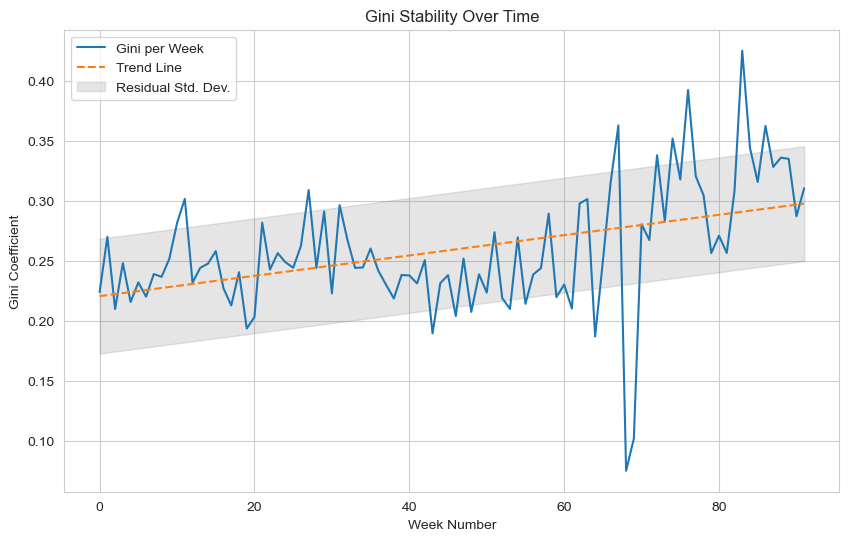

0.23510818199938777

In [248]:
stability_score_train = num_gini_stability(score_train)
stability_score_valid = num_gini_stability(score_valid)
stability_score_test = num_gini_stability(score_test)

#print(roc_auc_score(y_valid,y_valid_pred))
print(f'The stability score on the train set is: {stability_score_train}') 
print(f'The stability score on the valid set is: {stability_score_valid}') 
print(f'The stability score on the test set is: {stability_score_test}')
# Call the function with plotting turned on
gini_stability(score_train, plot=True)

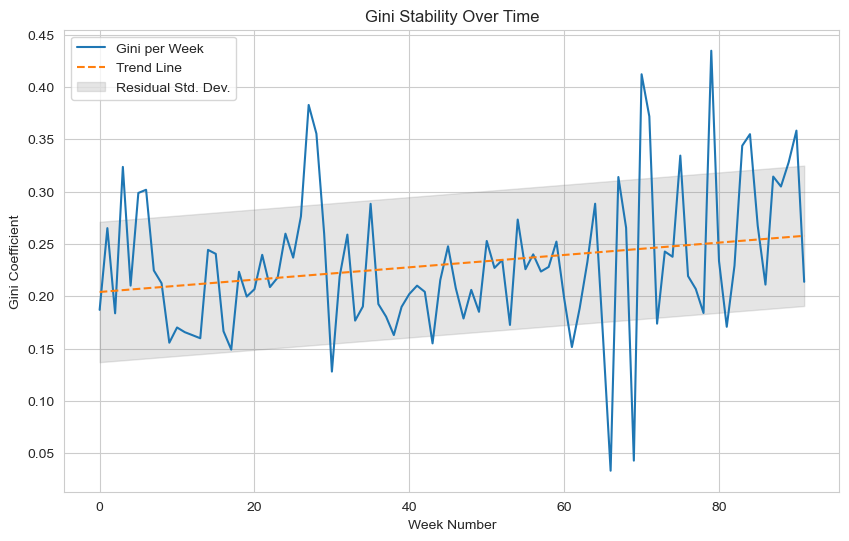

0.19736198667404287

In [249]:
gini_stability(score_valid, plot=True)

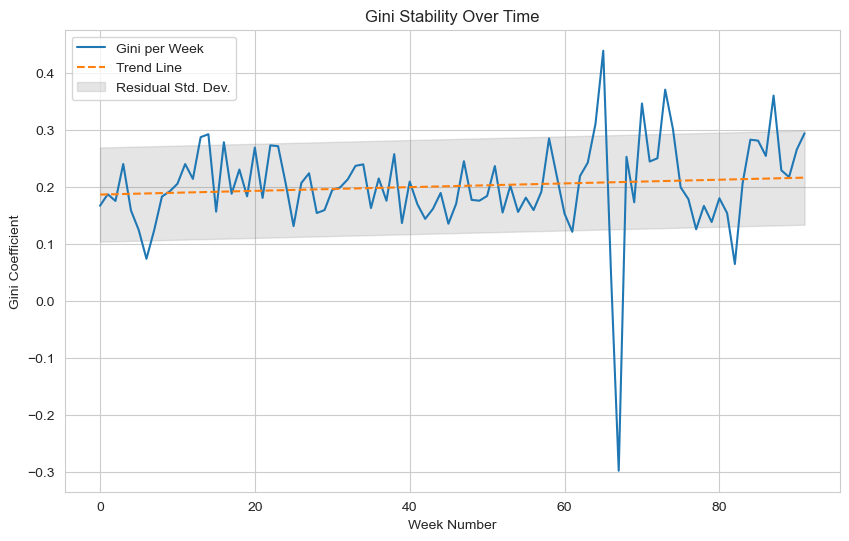

0.16062889831399382

In [250]:
gini_stability(score_test, plot=True)

In [251]:
len(clf.feature_importances_)

33

In [252]:
feat_imp = pd.DataFrame({'col': data_train.drop(columns = ['case_id','date_decision','MONTH','WEEK_NUM','target',]).columns.tolist(),
                         'feat_imp': clf.feature_importances_
                        })

In [253]:
feat_imp.sort_values(by = ['feat_imp'],ascending = False)

,col,feat_imp
4,sex_738L,0.125801
20,numberofqueries_373L,0.114590
6,education_927M,0.112562
22,cb_risk_mean,0.112459
3,incometype_1044T,0.111966
7,birth_259D,0.082575
1,familystate_447L,0.038649
21,prevdpd_max,0.028456
5,safeguarantyflag_411L,0.025787
15,numinstpaid_4499208L,0.017345


'numinstlsallpaid_934L','totaldebt_9A','childnum_185L','posfstqpd30lastmonth_3976962P','applications30d_658L','mastercontrelectronic_519L'

In [254]:
data_train2 = data_train.drop(columns = ['posfstqpd30lastmonth_3976962P','applications30d_658L','mastercontrelectronic_519L'])

In [268]:
# Train, validation, test split
data_train2_train, data_train2_test = train_test_split(data_train2.copy(),
                                            shuffle=True,
                                            #random_state=129,
                                            train_size = 0.6,
                                            stratify=data_train2['target'])

data_train2_valid, data_train2_test = train_test_split(data_train2_test.copy(),
                                            shuffle=True,
                                            #random_state=129,
                                            train_size = 0.5,
                                            stratify=data_train2_test['target'])

In [270]:
cols = data_train2.drop(columns = ['case_id','date_decision','MONTH','WEEK_NUM','target']).columns.tolist()

In [271]:
X2_train = data_train2_train.filter(cols)
y2_train = data_train2_train.target
X2_train[object_columns]=X2_train[object_columns].astype("category")
        
X2_valid = data_train2_valid.filter(cols)
y2_valid = data_train2_valid.target
X2_valid[object_columns]=X2_valid[object_columns].astype("category")
        
X2_test = data_train2_test.filter(cols)
y2_test = data_train2_test.target
X2_test[object_columns]=X2_test[object_columns].astype("category")
        
        
# Define XGBClassifier object
clf = XGBClassifier(objective='binary:logistic',eval_metric='auc',scale_pos_weight = 32, enable_categorical=True, max_cat_to_onehot=1,max_depth=3,n_estimators=100)
clf.fit(X2_train, y2_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=1, max_delta_step=None,
              max_depth=3, max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [272]:
y2_train_pred = clf.predict(X2_train)
y2_valid_pred = clf.predict(X2_valid)
y2_test_pred = clf.predict(X2_test)

In [273]:
roc_auc_score(y2_valid,y2_valid_pred)

0.6194832548987815

In [274]:
score2_train = data_train2_train.copy()
score2_train['pred']= y2_train_pred

score2_valid = data_train2_valid.copy()
score2_valid['pred']= y2_valid_pred

score2_test = data_train2_test.copy()
score2_test['pred']= y2_test_pred

stability_score_train = num_gini_stability(score2_train)
stability_score_valid = num_gini_stability(score2_valid)
stability_score_test = num_gini_stability(score2_test)

print(roc_auc_score(y2_valid,y2_valid_pred))
print(f'The stability score on the train set is: {stability_score_train}') 
print(f'The stability score on the valid set is: {stability_score_valid}') 
print(f'The stability score on the test set is: {stability_score_test}')

0.6194832548987815
The stability score on the train set is: 0.23602459326935585
The stability score on the valid set is: 0.20872629817637176
The stability score on the test set is: 0.16476503501335726


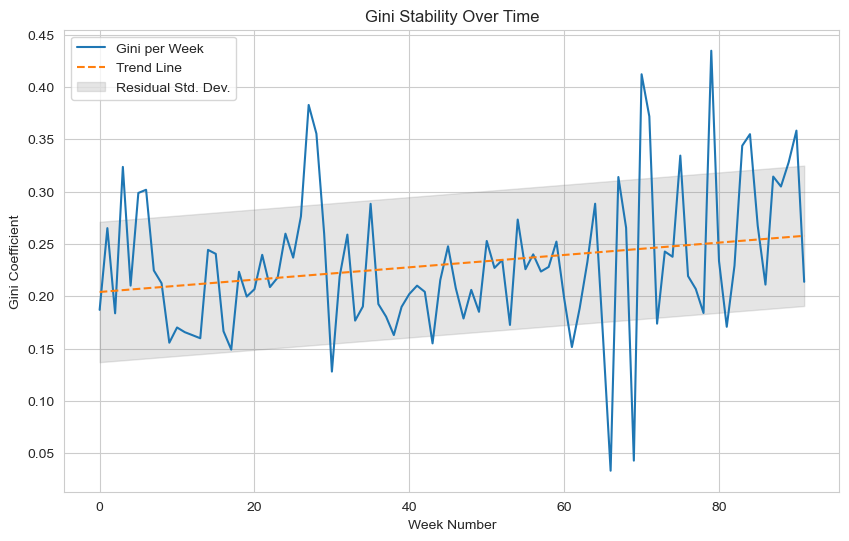

In [275]:
stability_score_train = gini_stability(score_valid, plot=True)

In [276]:
feat_imp2 = pd.DataFrame({'col': data_train2.drop(columns = ['case_id','date_decision','MONTH','WEEK_NUM','target',]).columns.tolist(),
                         'feat_imp': clf.feature_importances_
                        })

In [277]:
feat_imp2.sort_values(by = ['feat_imp'],ascending = False)

,col,feat_imp
4,sex_738L,0.163483
20,cb_risk_mean,0.116840
18,numberofqueries_373L,0.108710
6,education_927M,0.103565
3,incometype_1044T,0.100007
7,birth_259D,0.090923
1,familystate_447L,0.042399
5,safeguarantyflag_411L,0.023922
19,prevdpd_max,0.022638
13,numinstpaid_4499208L,0.019586


Removing the least important features seems to improve performance of the model a little bit.